In [108]:
# regular imports for the SARIMAX model

import geopandas as gp
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# import for checking exogenous variable correlation
from scipy.stats.stats import pearsonr

In [14]:
filename = 'NASA/POWER_Point_Monthly_Timeseries_1981_2020_048d4093N_123d5716W_LST.json'

df = gp.read_file(filename)

Idict = df['parameter'][0]
Idf =  pd.DataFrame.from_dict(Idict)
Idf
s_index = pd.DataFrame(Idf['ALLSKY_KT'])
#type(s_index)
s_index

,ALLSKY_KT
198401,0.43
198402,0.39
198403,0.47
198404,0.48
198405,0.48
...,...
202009,0.52
202010,0.45
202011,0.37
202012,0.35


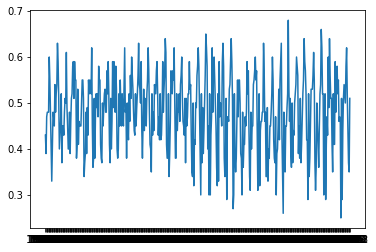

In [4]:
plt.plot(s_index['ALLSKY_KT'][:])

In [10]:
def append(dfseries):
    dfseries = dfseries[:4] + '/' + dfseries[4:]
    return dfseries
s_index = s_index.drop(s_index.index[12::13])
s_index['ds']=s_index.index
s_index['ds']= s_index['ds'].astype(str)

s_index['ds'] = s_index['ds'].apply(append)
s_index

,ALLSKY_KT,ds
198401,0.43,1984/01
198402,0.39,1984/02
198403,0.47,1984/03
198404,0.48,1984/04
198405,0.48,1984/05
...,...,...
202006,0.50,2020/06
202007,0.58,2020/07
202008,0.62,2020/08
202011,0.37,2020/11


In [11]:
import math

In [12]:
if math.isnan(s_index['ALLSKY_KT']):
    print(nan)

TypeError: cannot convert the series to <class 'float'>

In [15]:
# Modelling on SARIMAX

model = SARIMAX(s_index['ALLSKY_KT'].values, order=(4,1,0), seasonal_order=(1,1,1,12))
model_fit = model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.50378D-01    |proj g|=  1.41954D+00

At iterate    5    f= -8.30470D-01    |proj g|=  3.46081D+00

At iterate   10    f= -8.74624D-01    |proj g|=  5.14757D-01

At iterate   15    f= -9.09514D-01    |proj g|=  1.78877D-01

At iterate   20    f= -9.13204D-01    |proj g|=  1.62571D-01

At iterate   25    f= -9.18888D-01    |proj g|=  2.32924D-01

At iterate   30    f= -9.40193D-01    |proj g|=  1.67026D-01

At iterate   35    f= -9.62328D-01    |proj g|=  3.62043D-01

At iterate   40    f= -9.78092D-01    |proj g|=  1.08799D-02

At iterate   45    f= -9.79549D-01    |proj g|=  2.77161D-02

At iterate   50    f= -9.79830D-01    |proj g|=  7.01608D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/cbenstead/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [16]:
pred_sol = model_fit.predict(start = 1, end = 600)

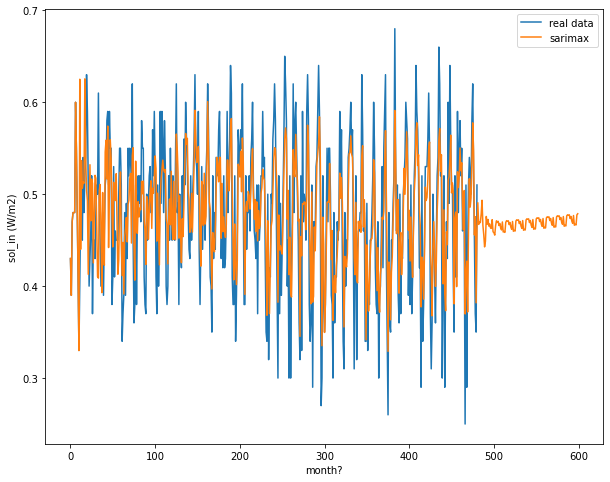

In [17]:
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(s_index['ALLSKY_KT'].values,label = 'real data')
ax.plot(pred_sol, label = 'sarimax')
ax.set_xlabel('month?')
ax.set_ylabel('sol_in (W/m2)')
ax.legend()

### Checking the correlation of other variables

I have no idea how to get the sarimax model working so...yeah

In [18]:
filename = 'NASA/POWER_Point_Monthly_Timeseries_1981_2020_048d4093N_123d5716W_LST.json'

df = gp.read_file(filename)

Idict = df['parameter'][0]
Idf =  pd.DataFrame.from_dict(Idict)

pd_df = pd.DataFrame(Idf)
#type(s_index)
pd_df.head()

,ALLSKY_KT,CLOUD_AMT,CLRSKY_KT,TOA_SW_DWN,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SRF_ALB,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_PAR_TOT,ALLSKY_SFC_SW_DIFF,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UV_INDEX
198401,0.43,71.46,0.66,2.80,-999.0,-999.0,0.23,-999.0,1.20,1.85,-999.0,-999.0,-999.0,-999
198402,0.39,82.41,0.69,4.35,-999.0,-999.0,0.23,-999.0,1.71,2.99,-999.0,-999.0,-999.0,-999
198403,0.47,76.16,0.72,6.63,-999.0,-999.0,0.21,-999.0,3.13,4.76,-999.0,-999.0,-999.0,-999
198404,0.48,77.63,0.74,8.97,-999.0,-999.0,0.16,-999.0,4.30,6.69,-999.0,-999.0,-999.0,-999
198405,0.48,75.46,0.73,10.75,-999.0,-999.0,0.25,-999.0,5.23,7.82,-999.0,-999.0,-999.0,-999


In [28]:
for i in range(len(pd_df)):
    #print(pd_df['CLOUD_AMT'][i])
    if pd_df['TOA_SW_DWN'][i] < 0:
        print([i], 'nan')

The for loop above checks if there are any unrecorded values in each variable. So far, ``ALLSKY_KT``, ``CLOUD_AMT``, ``CLRSKY_KT``, ``TOA_SW_DWN`` all have values greater than zero (aka recorded values for each month).

In [30]:
multidf = pd.DataFrame(pd_df[['ALLSKY_KT', 'CLOUD_AMT', 'CLRSKY_KT', 'TOA_SW_DWN']])
multidf.head()

,ALLSKY_KT,CLOUD_AMT,CLRSKY_KT,TOA_SW_DWN
198401,0.43,71.46,0.66,2.80
198402,0.39,82.41,0.69,4.35
198403,0.47,76.16,0.72,6.63
198404,0.48,77.63,0.74,8.97
198405,0.48,75.46,0.73,10.75


In [31]:
# removing the 13th month from the df:
multidf = multidf.drop(multidf.index[12::13])

In [32]:
# renaming ALLSKY_KT to y because this is our main variable
multidf = multidf.rename(columns={"ALLSKY_KT": "y"})

In [33]:
multidf

,y,CLOUD_AMT,CLRSKY_KT,TOA_SW_DWN
198401,0.43,71.46,0.66,2.80
198402,0.39,82.41,0.69,4.35
198403,0.47,76.16,0.72,6.63
198404,0.48,77.63,0.74,8.97
198405,0.48,75.46,0.73,10.75
...,...,...,...,...
202008,0.62,38.09,0.73,9.52
202009,0.52,47.92,0.63,7.34
202010,0.45,68.50,0.68,5.01
202011,0.37,79.25,0.66,3.17


### Correlation computations

according to the internet, a p-value of less than 0.05 indicates that the value of the coefficient is significant. A negative correlation coeff indicates a negative correlation between the two variables.

In [34]:
x = multidf['y'].values
y = multidf['CLOUD_AMT'].values

corr , p = pearsonr(x,y)
print ('Correlation Coefficient =', corr,'\nP-Value =',p)


Correlation Coefficient = -0.8746298785117084 
P-Value = 4.488244085486461e-141


In [35]:
# repeating the process for the other two variables selected

# CLEAR SKY

x = multidf['y'].values
z = multidf['CLRSKY_KT'].values

corr , p = pearsonr(x,z)
print ('Correlation Coefficient =', corr,'\nP-Value =',p)

Correlation Coefficient = 0.72585937880449 
P-Value = 7.719185767030187e-74


In [36]:
# Top-of-Atmosphere shortwave downward irradiance

x = multidf['y'].values
a = multidf['TOA_SW_DWN'].values

corr , p = pearsonr(x,a)
print ('Correlation Coefficient =', corr,'\nP-Value =',p)

Correlation Coefficient = 0.7528138789467527 
P-Value = 2.6637030138587476e-82


In [59]:
file = 'POWER_Point_Monthly_Timeseries_1981_2020_047d6664N_122d3020W_LST.json'

data = gp.read_file(file)


Idict = data['parameter'][0]
topd =  pd.DataFrame.from_dict(Idict)
#topd
raindf = pd.DataFrame(topd['PRECTOTCORR'])
#type(s_index)
raindf

,PRECTOTCORR
198101,2.54
198102,6.39
198103,3.00
198104,3.70
198105,2.15
...,...
202009,2.66
202010,3.40
202011,6.45
202012,5.93


In [60]:
raindf = raindf.drop(raindf.index[12::13])


In [61]:
raindf = raindf.loc['198401':]
display(raindf)

,PRECTOTCORR
198401,5.08
198402,4.49
198403,4.31
198404,3.59
198405,4.26
...,...
202008,0.51
202009,2.66
202010,3.40
202011,6.45


In [62]:
x = multidf['y'].values
r = raindf['PRECTOTCORR'].values

corr , p = pearsonr(x,r)
print ('Correlation Coefficient =', corr,'\nP-Value =',p)

Correlation Coefficient = -0.8017327311641812 
P-Value = 7.4896144781595e-101


In [85]:
model = SARIMAX(x, exog=y, order = (6,0,3), seasonal_order = (1,0,1,12))
model_fit = model.fit(disp = False)

/home/cbenstead/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [86]:
predict = model_fit.predict(exog = y, start = 1)

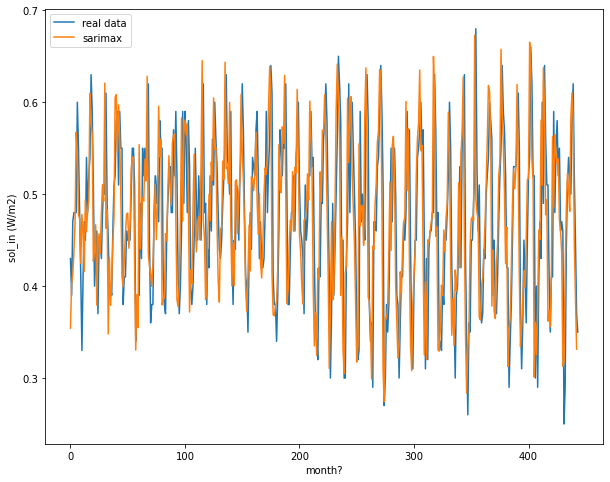

In [87]:
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(multidf['y'].values,label = 'real data')
ax.plot(predict, label = 'sarimax')
ax.set_xlabel('month?')
ax.set_ylabel('sol_in (W/m2)')
ax.legend()

### Creating a forecast/rolling mean thing

In [89]:
from pandas.tseries.offsets import DateOffset

In [125]:
new_index = multidf
def append(dfseries):
    dfseries = dfseries[:4] + '-' + dfseries[4:]
    return dfseries

new_index['ds']= new_index.index
new_index['ds']= new_index['ds'].astype(str)
new_index['ds'] = new_index['ds'].apply(append)

newdf = new_index.set_index('ds')

In [126]:
newdf

,y,CLOUD_AMT,CLRSKY_KT,TOA_SW_DWN,row_num
ds,,,,,
1984-01,0.43,71.46,0.66,2.80,0
1984-02,0.39,82.41,0.69,4.35,1
1984-03,0.47,76.16,0.72,6.63,2
1984-04,0.48,77.63,0.74,8.97,3
1984-05,0.48,75.46,0.73,10.75,4
...,...,...,...,...,...
2020-08,0.62,38.09,0.73,9.52,439
2020-09,0.52,47.92,0.63,7.34,440
2020-10,0.45,68.50,0.68,5.01,441


In [128]:
import datetime as dt

In [129]:
newdf.index = pd.to_datetime(newdf.index)
newdf

,y,CLOUD_AMT,CLRSKY_KT,TOA_SW_DWN,row_num
ds,,,,,
1984-01-01,0.43,71.46,0.66,2.80,0
1984-02-01,0.39,82.41,0.69,4.35,1
1984-03-01,0.47,76.16,0.72,6.63,2
1984-04-01,0.48,77.63,0.74,8.97,3
1984-05-01,0.48,75.46,0.73,10.75,4
...,...,...,...,...,...
2020-08-01,0.62,38.09,0.73,9.52,439
2020-09-01,0.52,47.92,0.63,7.34,440
2020-10-01,0.45,68.50,0.68,5.01,441


In [132]:
type(newdf.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [134]:
pred_date=[newdf.index[-1]+ DateOffset(months= x)for x in range(0,24)]

In [135]:
pred_date = pd.DataFrame(index=pred_date[1:], columns=newdf.columns)
pred_date

,y,CLOUD_AMT,CLRSKY_KT,TOA_SW_DWN,row_num
2021-01-01,NaN,NaN,NaN,NaN,NaN
2021-02-01,NaN,NaN,NaN,NaN,NaN
2021-03-01,NaN,NaN,NaN,NaN,NaN
2021-04-01,NaN,NaN,NaN,NaN,NaN
2021-05-01,NaN,NaN,NaN,NaN,NaN
2021-06-01,NaN,NaN,NaN,NaN,NaN
2021-07-01,NaN,NaN,NaN,NaN,NaN
2021-08-01,NaN,NaN,NaN,NaN,NaN
2021-09-01,NaN,NaN,NaN,NaN,NaN
2021-10-01,NaN,NaN,NaN,NaN,NaN


In [136]:
newdf =pd.concat([newdf,pred_date])

In [138]:
b = multidf['y'].values
c = newdf['CLOUD_AMT'].values

model = SARIMAX(b, exog=c, order = (6,0,3), seasonal_order = (1,0,1,12))
model_fit = model.fit(disp = False)

MissingDataError: exog contains inf or nans